# Note!
This is a almost cell-by-cell copy of the work done by Aaron Schlegel. I practically don't own any of the work here.
See the original posts here:

[Part 1: Extraction and Feature Engineering](https://aaronschlegel.me/extraction-feature-engineering-aac-data-requests-pandas.html)

[Part 2: Exploratory Data Analysis](https://aaronschlegel.me/exploratory-data-analysis-shelter-cat-outcomes-pandas-seaborn.html)

[Part 3: Machine Learning for Outcome Prediction](https://aaronschlegel.me/predict-shelter-cat-outcomes-scikit-learn-machine-learning.html)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

import re
from datetime import datetime, timedelta

In [2]:
df = pd.read_csv('aac_shelter_outcomes.csv', parse_dates=['date_of_birth','datetime','monthyear'])
dogs_df = df[df.animal_type == 'Dog']
dogs_df.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06,2013-11-07 11:47:00,2013-11-07 11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31,2014-06-03 14:20:00,2014-06-03 14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02,2014-06-15 15:50:00,2014-06-15 15:50:00,Monday,Partner,Transfer,Neutered Male
5,4 months,A664462,Dog,Leonberger Mix,Brown/White,2013-06-03,2013-10-07 13:06:00,2013-10-07 13:06:00,*Edgar,Partner,Transfer,Intact Male
7,3 years,A692618,Dog,Chihuahua Shorthair Mix,Brown,2011-11-23,2014-12-08 15:55:00,2014-12-08 15:55:00,*Ella,Partner,Transfer,Spayed Female


<ipython-input-3-2def6cc32e97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dogs_df['age'] = (dogs_df.datetime - dogs_df.date_of_birth).dt.days


<AxesSubplot:>

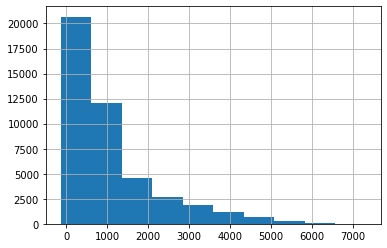

In [3]:
dogs_df['age'] = (dogs_df.datetime - dogs_df.date_of_birth).dt.days
dogs_df.age.hist()

In [4]:
dogs_df['puppy'] = dogs_df.age <= 365


<ipython-input-4-f671585b4dc0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dogs_df['puppy'] = dogs_df.age <= 365


In [5]:
dogs_df.outcome_type.value_counts(dropna=False)

Adoption           20052
Return to Owner    12875
Transfer            9518
Euthanasia          1504
Died                 138
Rto-Adopt            117
Disposal              17
Missing               17
NaN                    4
Name: outcome_type, dtype: int64

In [6]:
dogs_df['dob_year'] = dogs_df['date_of_birth'].dt.year
dogs_df['dob_month'] = dogs_df['date_of_birth'].dt.month
dogs_df['dob_monthyear'] = pd.to_datetime(
    dogs_df['monthyear']).dt.to_period('M')

dogs_df['outcome_month'] = dogs_df['datetime'].dt.month
dogs_df['outcome_year'] = dogs_df['datetime'].dt.year
dogs_df['outcome_weekday'] = dogs_df['datetime'].dt.weekday
dogs_df['outcome_hour'] = dogs_df['datetime'].dt.hour


<ipython-input-6-b490fe3f8b1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dogs_df['dob_year'] = dogs_df['date_of_birth'].dt.year
<ipython-input-6-b490fe3f8b1a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dogs_df['dob_month'] = dogs_df['date_of_birth'].dt.month
<ipython-input-6-b490fe3f8b1a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [7]:
dogs_df['breed'].value_counts()

Pit Bull Mix                             6135
Chihuahua Shorthair Mix                  4733
Labrador Retriever Mix                   4608
German Shepherd Mix                      1892
Australian Cattle Dog Mix                1059
                                         ... 
Boxer/Queensland Heeler                     1
Chinese Sharpei/Bull Terrier                1
Cairn Terrier/Border Terrier                1
Doberman Pinsch/Border Collie               1
Miniature Pinscher/Smooth Fox Terrier       1
Name: breed, Length: 1893, dtype: int64

In [8]:
{k: v for k, v in zip(dogs_df['breed'].value_counts().index, dogs_df['breed'].value_counts())}


{'Pit Bull Mix': 6135,
 'Chihuahua Shorthair Mix': 4733,
 'Labrador Retriever Mix': 4608,
 'German Shepherd Mix': 1892,
 'Australian Cattle Dog Mix': 1059,
 'Dachshund Mix': 798,
 'Boxer Mix': 674,
 'Miniature Poodle Mix': 648,
 'Border Collie Mix': 646,
 'Catahoula Mix': 476,
 'Rat Terrier Mix': 456,
 'Australian Shepherd Mix': 454,
 'Yorkshire Terrier Mix': 437,
 'Siberian Husky Mix': 418,
 'Jack Russell Terrier Mix': 416,
 'Miniature Schnauzer Mix': 392,
 'Beagle Mix': 384,
 'Chihuahua Longhair Mix': 359,
 'Staffordshire Mix': 350,
 'Great Pyrenees Mix': 330,
 'Cairn Terrier Mix': 330,
 'Pointer Mix': 325,
 'Rottweiler Mix': 321,
 'American Bulldog Mix': 314,
 'Shih Tzu Mix': 282,
 'Anatol Shepherd Mix': 252,
 'Chihuahua Shorthair/Dachshund': 247,
 'Plott Hound Mix': 246,
 'Black Mouth Cur Mix': 241,
 'Australian Kelpie Mix': 240,
 'Pit Bull': 234,
 'Labrador Retriever': 230,
 'American Staffordshire Terrier Mix': 224,
 'German Shepherd': 217,
 'Labrador Retriever/Pit Bull': 209,
 '

In [9]:
dogs_df.breed.value_counts()[dogs_df.breed.value_counts(
) > 10].sum() / len(dogs_df)
len(dogs_df.breed.unique()), len(dogs_df.breed.value_counts()[dogs_df.breed.value_counts(
) > 10])


(1893, 309)

In [10]:
dogs_df['breed'] = dogs_df['breed'].str.lower().str.replace('mix', '').str.strip()

<ipython-input-10-94f2cc151e70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dogs_df['breed'] = dogs_df['breed'].str.lower().str.replace('mix', '').str.strip()


In [11]:
with open('dog_breeds.txt','r') as f:
    tkc_breeds = f.read().strip().lower().split('\n')
len(tkc_breeds)

222

The way The Kennel Club names things is a bit messy -- let's clean it up!

In [12]:
tkc_breeds = [t.replace('(imp)','').strip() for t in tkc_breeds]
# not official, just handcrafted by me
tkc_alts = {}
for t in tkc_breeds:
    front = t.split('(')[0].strip()
    if ' & ' in front:
        front = front.replace(' & ','&')
    back = t.split('(')[1].replace(')','').strip() if '(' in t else ''
    if ' & ' in back:
        back = back.replace(' & ', '&')
    alts = [t, back+' '+front]
    if not any(front in s and s!=t for s in tkc_breeds):
        alts.append(front)
    if 'fox ' in front:
        alts.append(back+' hair '+front)
    if 'bull terrier' == front:
        alts.append(back + ' american '+front)
    if 'haired' in back:
        alts.append(back[:-2].replace(' ','') + ' ' + front)
    if front[-4:] == ' dog':
        alts.append(back + ' ' + front[:-4])
    if 'coonhound' in front:
        alts.append(back + ' ' + front.replace('coonhound','hound'))
    tkc_alts[t] = [a.strip() for a in alts]
tkc_lookup = {v:k for k,vs in tkc_alts.items() for v in vs}

In [13]:
tkc_breeds = '|'.join(v for v in tkc_lookup)

In [14]:
new_cols = dogs_df['breed'].str.replace('black/tan','black&tan').str.split('/', expand=True).rename(
    columns={0: 'breed1', 1: 'breed2'})
dogs_df['breed1'] = new_cols['breed1']
dogs_df['breed2'] = new_cols['breed2']

dogs_df['tkc_breed'] = (dogs_df['breed1'].str.contains(tkc_breeds)) | \
                        (dogs_df['breed2'].str.contains(tkc_breeds))

dogs_df['pit_bull_breed'] = (dogs_df['breed1'].str.contains('pit bull')) | \
                             (dogs_df['breed2'].str.contains('pit bull'))

<ipython-input-14-f244fa2cd93d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dogs_df['breed1'] = new_cols['breed1']
<ipython-input-14-f244fa2cd93d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dogs_df['breed2'] = new_cols['breed2']
/Users/lyndonf/Library/Python/3.8/lib/python/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
<ipython-input-14-f244fa2cd93d>:6: SettingWithCopyWarning:

In [15]:
dogs_df[~dogs_df['tkc_breed']]

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,...,dob_month,dob_monthyear,outcome_month,outcome_year,outcome_weekday,outcome_hour,breed1,breed2,tkc_breed,pit_bull_breed
2,1 year,A675708,Dog,pit bull,Blue/White,2013-03-31,2014-06-03 14:20:00,2014-06-03 14:20:00,*Johnny,NaN,...,3,2014-06,6,2014,1,14,pit bull,None,False,True
7,3 years,A692618,Dog,chihuahua shorthair,Brown,2011-11-23,2014-12-08 15:55:00,2014-12-08 15:55:00,*Ella,Partner,...,11,2014-12,12,2014,0,15,chihuahua shorthair,None,False,False
15,2 years,A680396,Dog,rat terrier,White/Black,2012-06-02,2014-06-15 15:11:00,2014-06-15 15:11:00,*Truman,Partner,...,6,2014-06,6,2014,6,15,rat terrier,None,False,False
16,1 year,A674298,Dog,pit bull,Brown Brindle/White,2013-03-11,2014-04-16 12:51:00,2014-04-16 12:51:00,*Newt,Partner,...,3,2014-04,4,2014,2,12,pit bull,None,False,True
26,4 months,A669621,Dog,plott hound,Brown Brindle/Black,2013-08-23,2013-12-25 09:47:00,2013-12-25 09:47:00,NaN,Partner,...,8,2013-12,12,2013,2,9,plott hound,None,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78224,1 year,A708765,Dog,blue lacy,Blue/White,2014-07-31,2015-08-30 14:50:00,2015-08-30 14:50:00,Rocko,NaN,...,7,2015-08,8,2015,6,14,blue lacy,None,False,False
78225,2 years,A756164,Dog,akbash,White,2015-08-15,2017-08-23 17:44:00,2017-08-23 17:44:00,Baby,NaN,...,8,2017-08,8,2017,2,17,akbash,None,False,False
78227,2 years,A756164,Dog,akbash,White,2015-08-15,2017-09-24 13:04:00,2017-09-24 13:04:00,Baby,NaN,...,8,2017-09,9,2017,6,13,akbash,None,False,False
78238,1 year,A765862,Dog,chihuahua shorthair,Blue/Tricolor,2017-01-28,2018-02-01 17:36:00,2018-02-01 17:36:00,NaN,NaN,...,1,2018-02,2,2018,3,17,chihuahua shorthair,None,False,False


In [16]:
(~dogs_df['pit_bull_breed'] & ~dogs_df['tkc_breed']).sum() / len(dogs_df)

0.2680484607386646

In [17]:
dogs_df['color'] = [re.sub(' */ *', '/', s).lower() for s in dogs_df['color']]
new_cols = dogs_df['color'].str.split(
    '/', expand=True).rename(columns={0: 'color1', 1: 'color2'})
dogs_df['color1'] = new_cols['color1']
dogs_df['color2'] = new_cols['color2']

<ipython-input-17-6d0c5ed54922>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dogs_df['color'] = [re.sub(' */ *', '/', s).lower() for s in dogs_df['color']]
<ipython-input-17-6d0c5ed54922>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dogs_df['color1'] = new_cols['color1']
<ipython-input-17-6d0c5ed54922>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [18]:
dogs_df.to_csv('dogs_df_clean.csv', index=False, encoding='utf-8')